In [56]:
import dztheo
import bobina
import numpy as np
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot as plot
import matplotlib.pyplot as plt
import solartron as so


In [2]:

import cnea.theo as dztheo
import cnea.bo as bobina

import numpy as np
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

f=100
bo=bobina.bobpp1
sigma=4.8e6
mur=90
lmax=1000
args=[f,bo,sigma,mur,lmax]
xv=np.linspace(0,20e-3,40)
zv=np.linspace(-5e-3,0,20)
Jxz=np.zeros((40,20),dtype=np.complex_)
for i,x in enumerate(xv):
    for j,z in enumerate(zv):
        Jxz[i,j]=dztheo.jhf(x,z,60e-3,*args)
jnorm=np.absolute(Jxz)/np.max(np.absolute(Jxz))      
trace=[go.Contour(x=xv*1000,y=zv*1000,z=np.transpose(jnorm*100),
        contours=dict(  showlabels = True     ))]
plot(trace)  

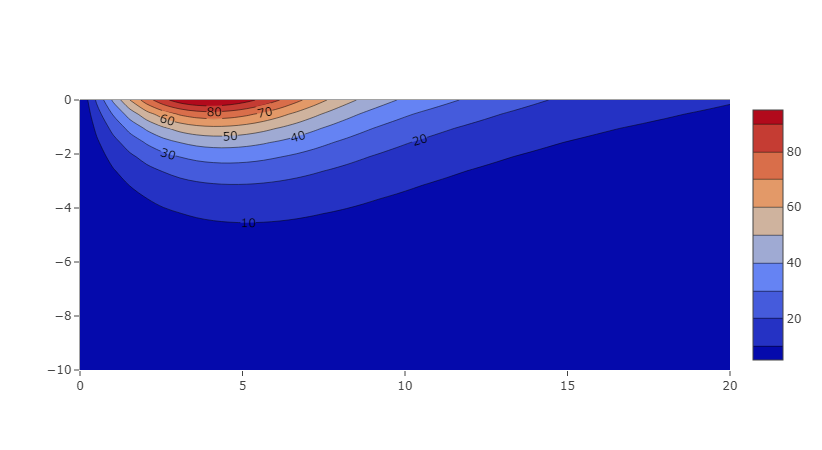

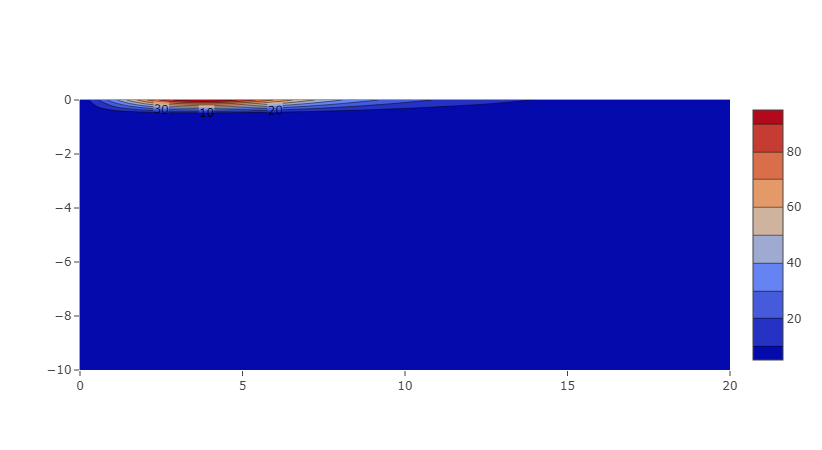

In [36]:
f=100e3
mur=90
sigma=4.8e6
lmax=5000
args=[f,bo,sigma,mur,lmax]
Jxz=np.zeros((40,20),dtype=np.complex_)
for i,x in enumerate(xv):
    for j,z in enumerate(zv):
        Jxz[i,j]=dztheo.jhf(x,z,1.75e-3,*args)
jnorm=np.absolute(Jxz)/np.max(np.absolute(Jxz))      
trace=[go.Contour(x=xv*1000,y=zv*1000,z=np.transpose(jnorm*100),
        contours=dict(  showlabels = True     ))]
plot(trace)        

In [11]:
def Jnorm(f,sigma,mur):
    args[0]=f
    args[2]=sigma
    args[3]=mur
    args[4]=3000
    I=30e-3
    Jxz=np.zeros((len(xv),len(zv)),dtype=np.complex_)
    for i,x in enumerate(xv):
        for j,z in enumerate(zv):
            
            Jxz[i,j]=dztheo.jhf(x,z,I,*args)
            
    Jnorm=np.absolute(Jxz)/np.max(np.absolute(Jxz))       
    trace=go.Contour(x=xv*1000,y=zv*1000,z=np.transpose(Jnorm),
        contours=dict(  showlabels = True     ))
               
    return([Jnorm,trace])


def geta(j):
    a=list()
    for i in range(0,10):
        a.append(np.sum(np.sum(j[2*i:,:]))/sum(sum(j)))
    return(np.flip(np.array(a)))

In [5]:
j2=Jnorm(xv,zv,*args,name='asfa',mur='100')


NameError: name 'xv' is not defined

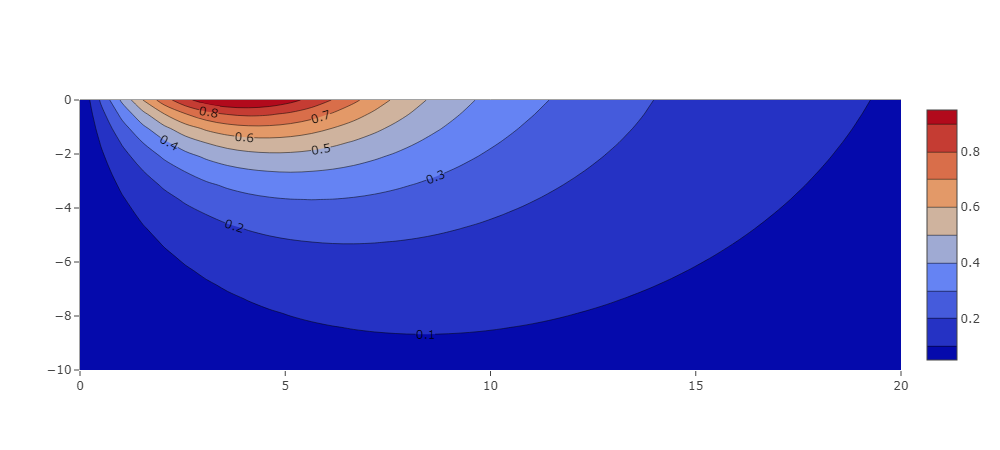

In [7]:
fs=[   100.    ,    158.4893,    251.1886,    398.1072,    630.9573,                            1000.    ,   1584.893 ,   2511.886 ,   3981.072 ,   6309.573 ,
                           10000.    ,  15848.93  ,  25118.87  ,  39810.72  ,  63095.73  ,                         100000.    ]

In [10]:
xv=np.linspace(0,20e-3,40)
zv=np.linspace(-5e-3,0,20)
bo=bobina.bobpp1

sigma=4.8e6
mur=90
lmax=2000
args=[f,bo,sigma,mur,lmax]
jlist=list()
alist=list()
dalist=list()
for f in fs:
    x=Jnorm(f,3.8e6,90)
    jlist.append(x)
    alist.append(geta(x[0]))
    dalist.append(np.gradient(geta(x[0])))

In [86]:

def jmap(sigma,mur):
    jlist=list()
    alist=list()
    dalist=list()
    for f in fs:
        x=Jnorm(f,sigma,mur)
        jlist.append(x)
        alist.append(geta(x[0]))
        dalist.append(np.gradient(geta(x[0])))
    return([jlist,alist,dalist])    

def uplot(y,tipo='markers'):
    
    dataplot=list()
    
    for i in y:
        x=np.linspace(1,len(i),len(i))

        trace0 = go.Scatter(
            x = x,
            y = i,
            mode = tipo)
        
        dataplot.append(trace0)
    
    
    
    layout = go.Layout(
        xaxis=dict(        type='linear',zeroline=False , autorange=True   ),
        yaxis=dict(        type='linear',zeroline=False,autorange=True  )
    )

    fig = go.Figure(data=dataplot, layout=layout)
    plotly.offline.iplot(fig)
    return(fig)


In [15]:
j_alu=jmap(38e6,1)

In [29]:
j_alu2=jmap(4.8e6,1)

In [36]:
j_ferro=jmap(4.8e6,90)

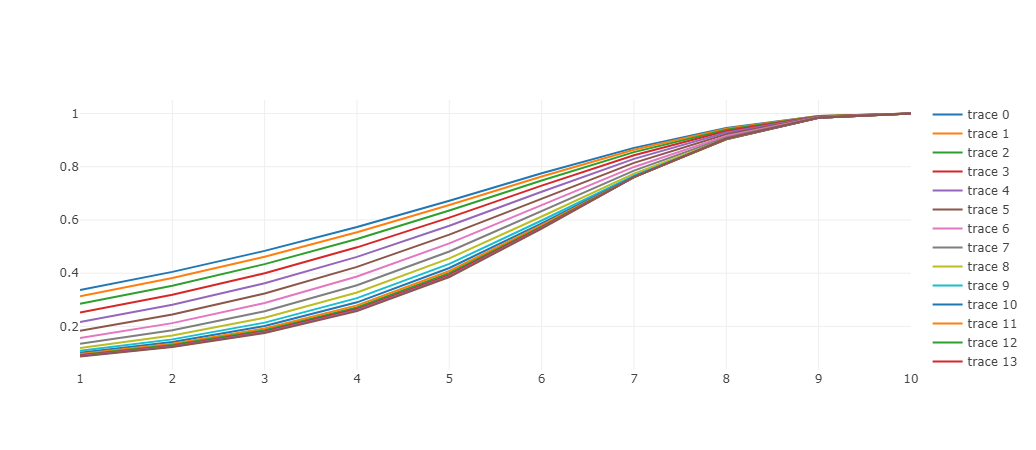

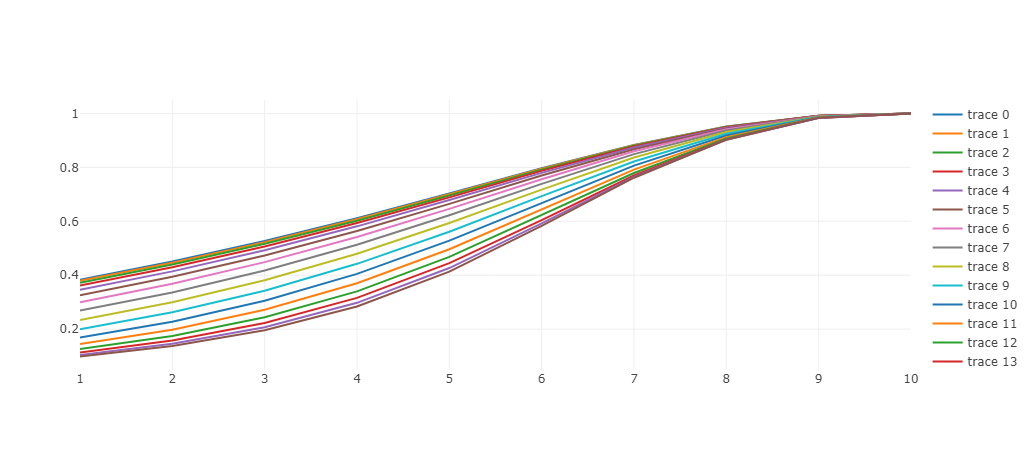

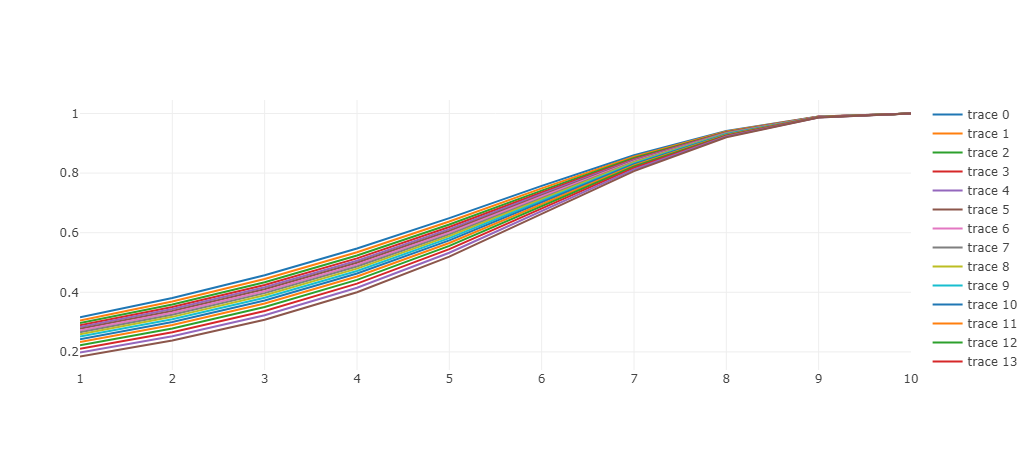

In [69]:
fig1=uplot(j_alu[1],'lines')
fig2=uplot(j_alu2[1],'lines')
fig3=uplot(j_ferro[1],'lines')

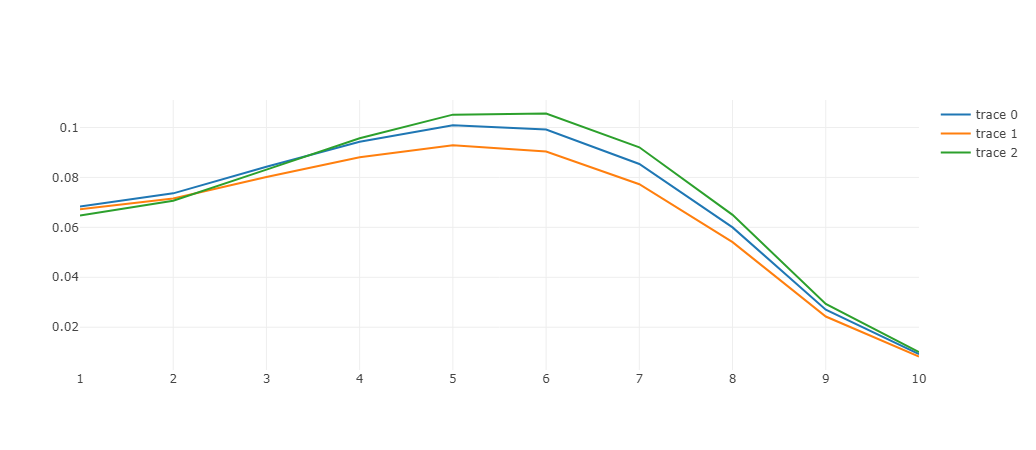

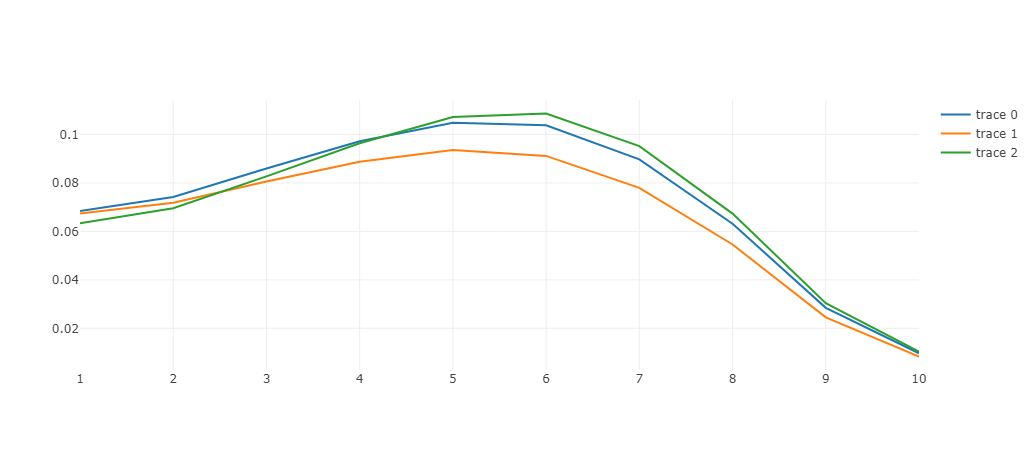

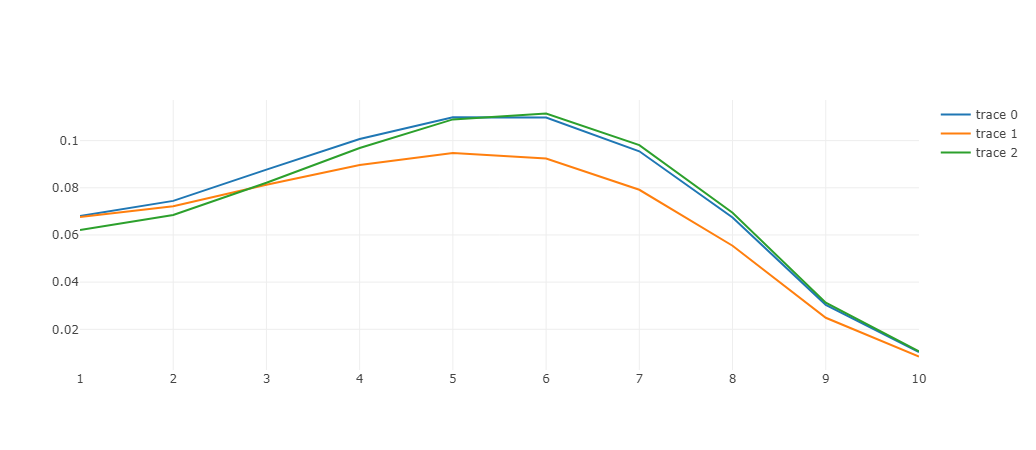

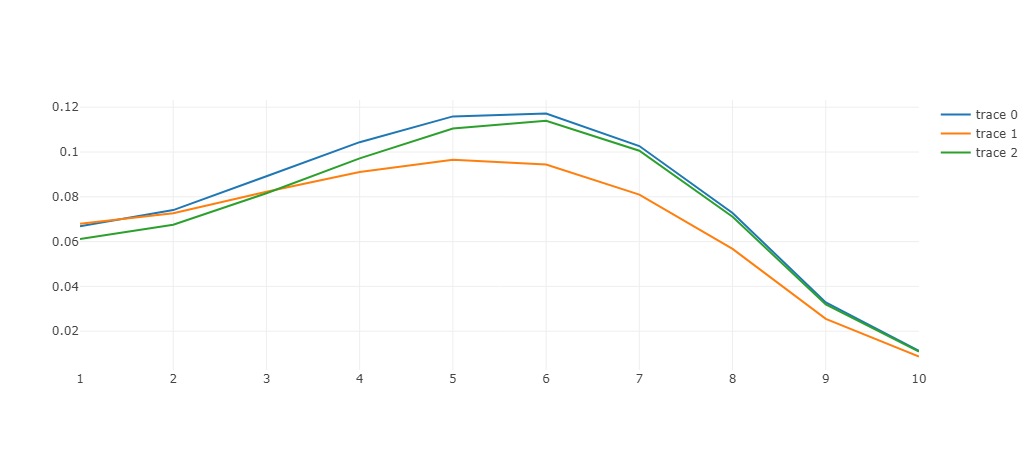

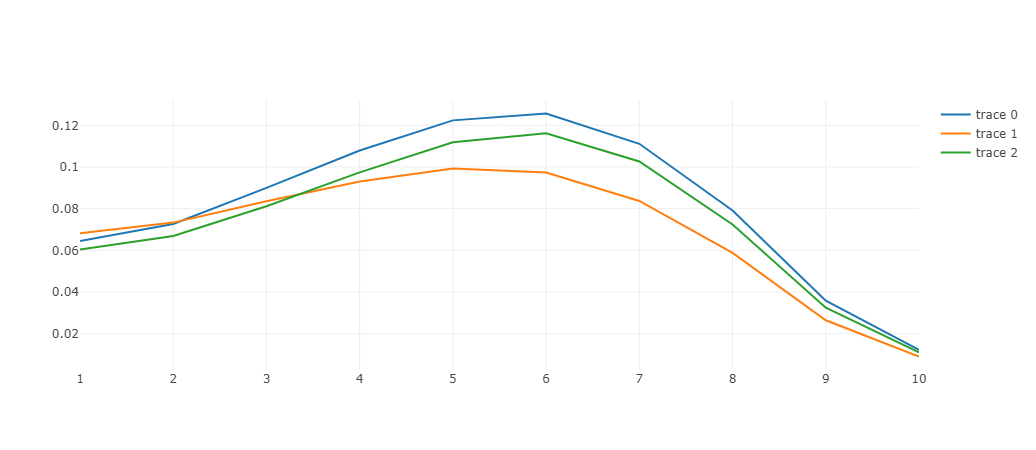

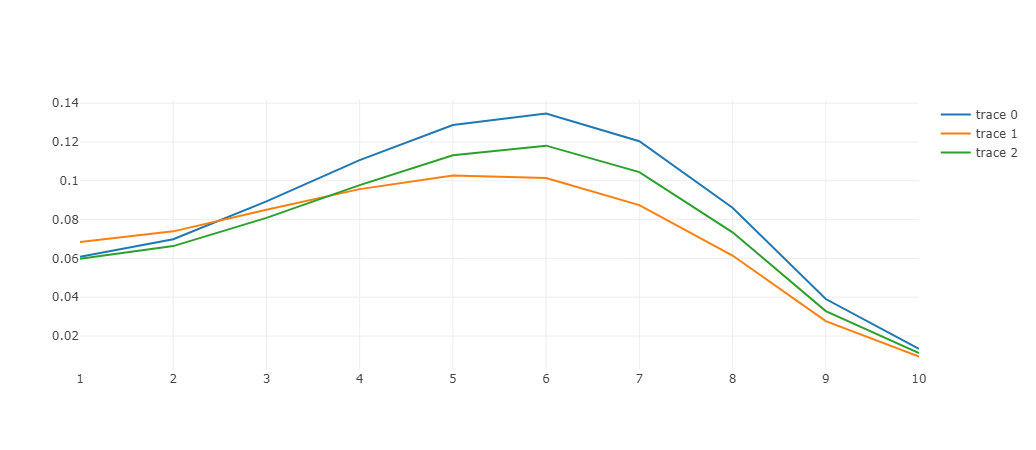

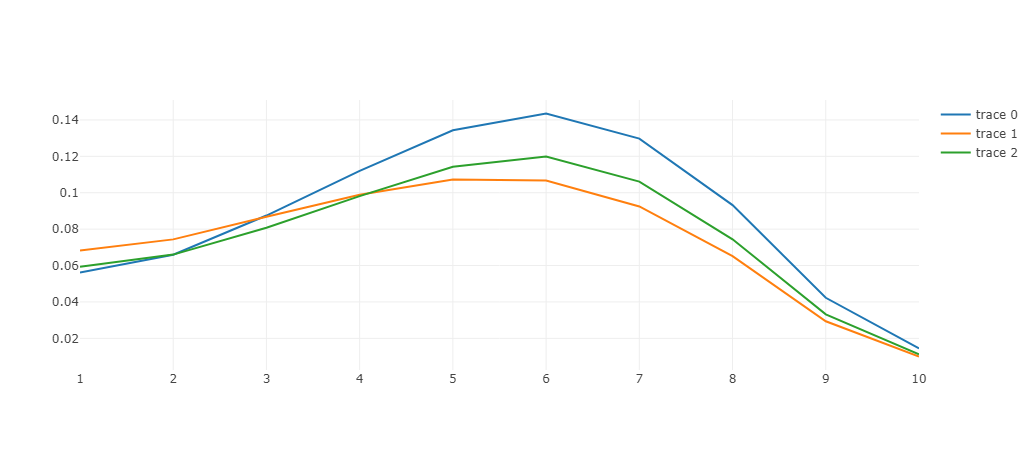

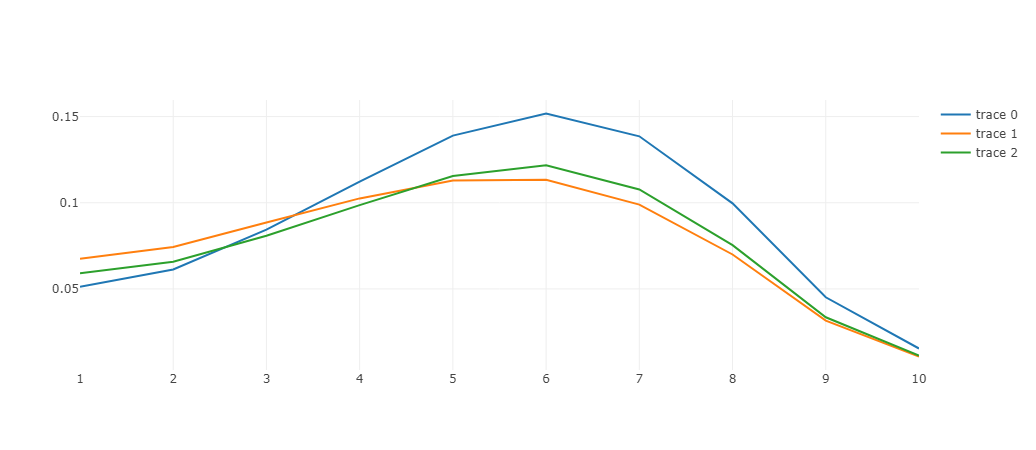

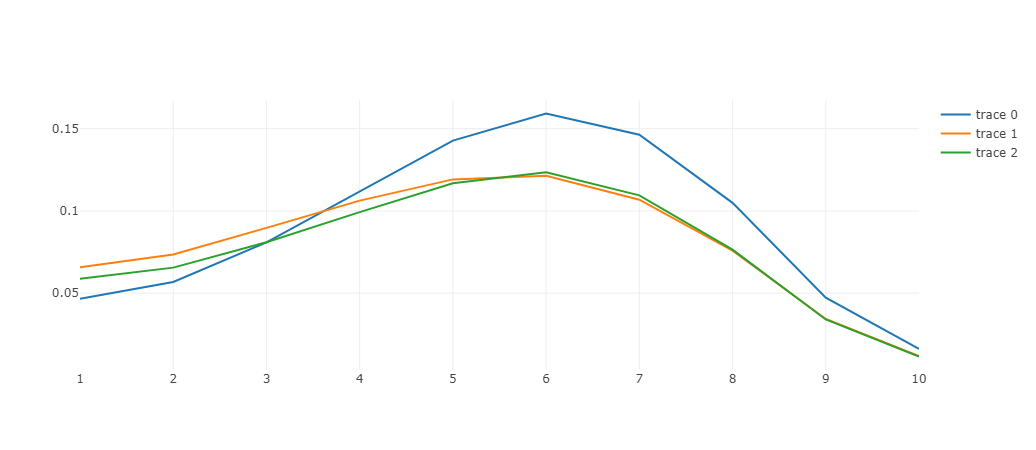

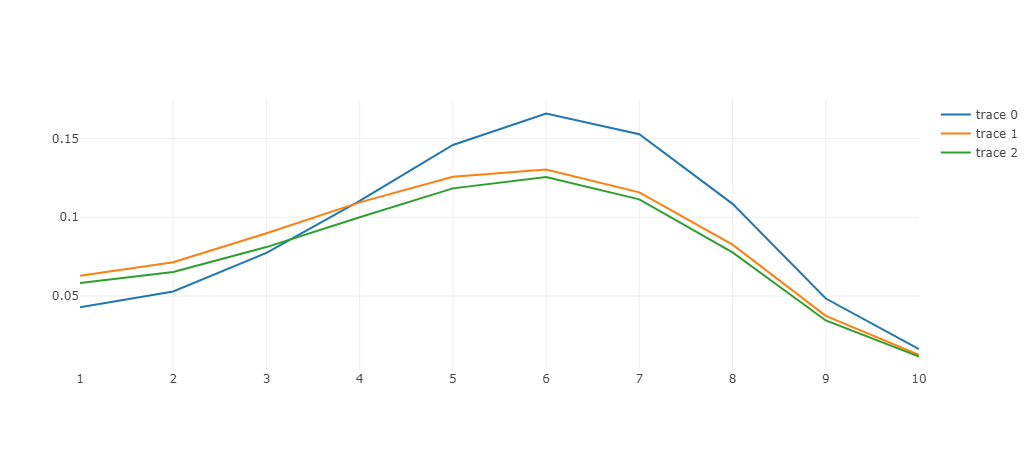

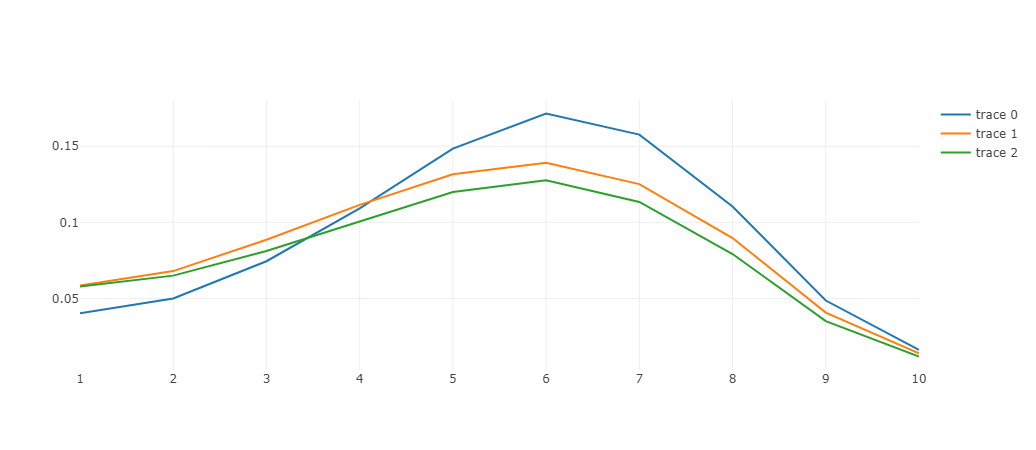

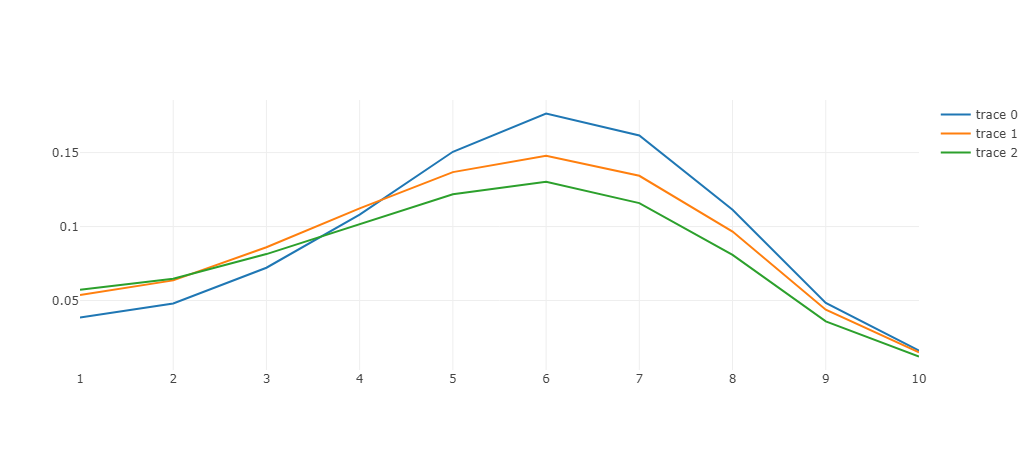

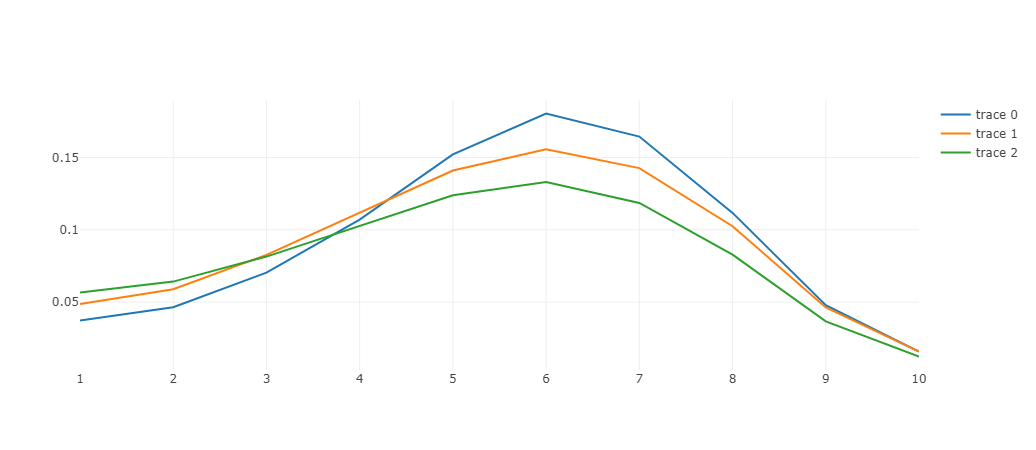

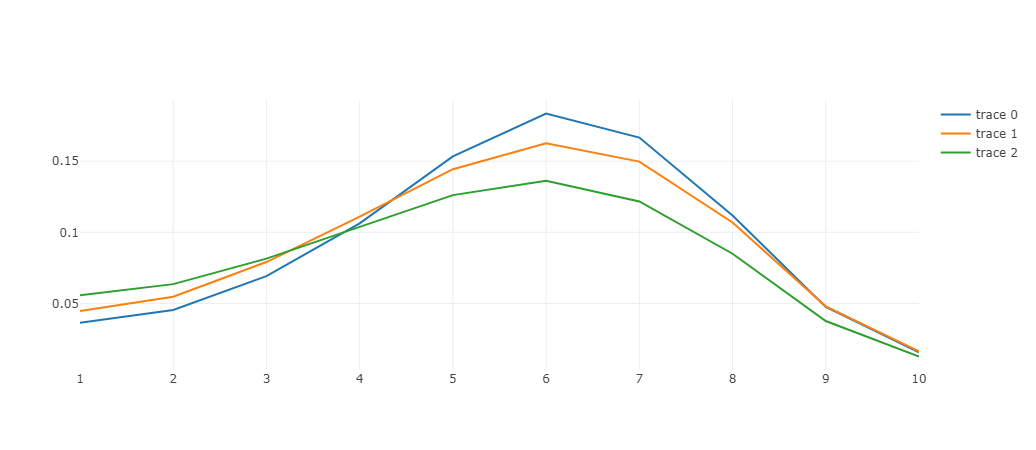

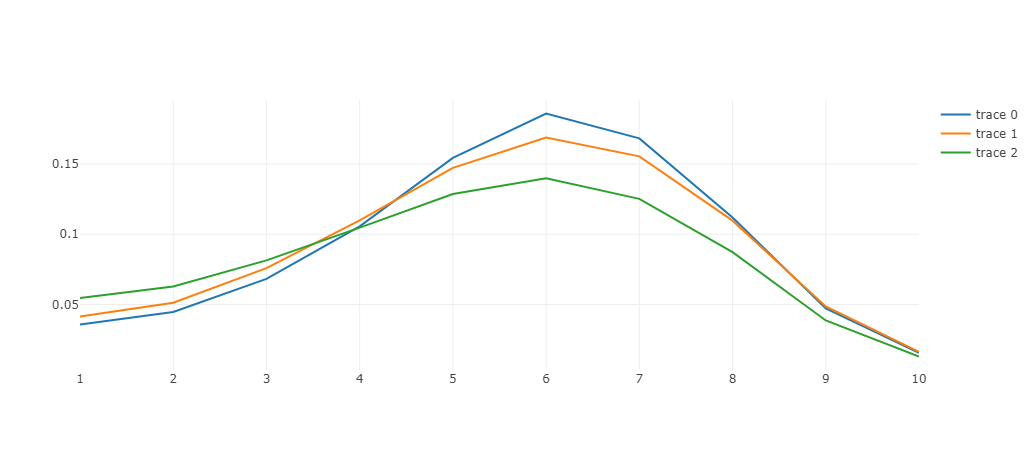

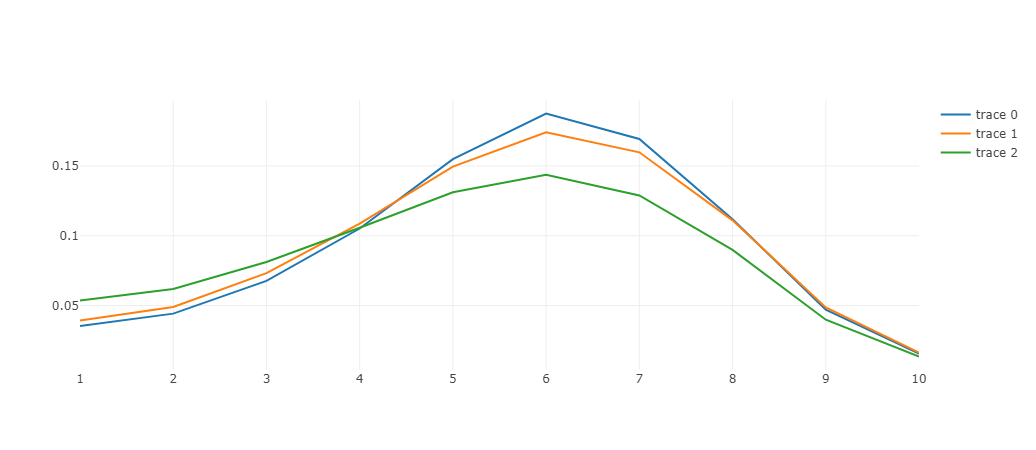

In [98]:
for i,y in enumerate(j_alu[1]):
    uplot([j_alu[2][i],j_alu2[2][i],j_ferro[2][i]],'lines')
    